In [ ]:
RunningInCOLAB = 'google.colab' in str(get_ipython())
RunningInCOLAB

True

In [ ]:
import xml.etree.ElementTree as ET
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def parseXML(xmlfile, id, filenamexml):
    tree = ET.parse(xmlfile)
    root = tree.getroot()
    object_name=[]
    xmin=[]
    ymin=[]
    xmax=[]
    ymax=[]
    
    file_name="{}.{}".format(filenamexml,"png")
    
    for item in root:
        #if item.tag=="filename":
            #file_name=item.text
        if item.tag=="size":
            for child in item:
                if child.tag=="width":
                    img_width=int(child.text)
                if child.tag=="height":
                    img_height=int(child.text)
                if child.tag=="depth":
                    img_depth=int(child.text)

        if item.tag=="object":
            for child in item:
                if child.tag=="name":
                    object_name.append(child.text.lower())
                if child.tag=="bndbox":
                    for grandchild in child:
                        if grandchild.tag=="xmin":
                            xmin.append(int(grandchild.text))
                        if grandchild.tag=="ymin":
                            ymin.append(int(grandchild.text))
                        if grandchild.tag=="xmax":
                            xmax.append(int(grandchild.text))                          
                        if grandchild.tag=="ymax":
                            ymax.append(int(grandchild.text))

    attributes=[]
    for i in range(0,len(object_name)):
        attributes.append([id,file_name,img_width,img_height,img_depth,len(object_name),i,object_name[i],xmin[i],ymin[i],xmax[i],ymax[i]])
    return attributes

In [ ]:
def load_anotations_from_folder(folder):
    anotations = []
    id=0
    for full_filename in os.listdir(folder):
        filename=full_filename[:-4]
        img_data = parseXML(os.path.join(folder,full_filename),id,filename)
        id+=1
        if img_data is not None:
            for i in range(0,len(img_data)):
                anotations.append(img_data[i])
    return anotations

In [ ]:
def extract_objects_from_image_in_folder(folder_target_parent,
                                         categories,
                                          folder,
                                          img_data):
    print(os.getcwd())
    saved=False
    full_filename_source=img_data.name.iloc[0]
    filename_source=full_filename_source[:-4]
    if not img_data.name.empty:
        if not folder_target_parent in os.listdir():
            os.makedirs(folder_target_parent)

        os.chdir(folder_target_parent)    

        for category in categories:
            if not category in os.listdir():
                os.makedirs(category)
        os.chdir("..") #Sale del directorio target_parent
        #print(img_data.name)
        img = cv2.imread(os.path.join(folder,full_filename_source))
        print(img.shape)
        os.chdir(folder_target_parent)

        if img is None:
            print(full_filename_source)
        else:
            plt.imshow(img)
            for i in range(0,len(img_data)):
                img_out=img[img_data.ymin.iloc[i]:img_data.ymax.iloc[i],
                        img_data.xmin.iloc[i]:img_data.xmax.iloc[i],
                        :]
                #print(img_data.ymin.iloc[i])
                #print(img_data.ymax.iloc[i])
                #print(img_data.xmin.iloc[i])
                #print(img_data.xmax.iloc[i])
                os.chdir(img_data.obj_class.iloc[i])
                serial=len(os.listdir())
                filename="{}_{}.{}".format(filename_source, f'{img_data.obj_id.iloc[i]:03}', "png")
                print(filename)
                #print(img_out)
                #plt.imshow(img_out)
                saved=cv2.imwrite(filename, img_out)
                os.chdir("..") #sale del directorio de la clase

        os.chdir("..") #Sale del directorio target_parent
    print("-----")
    return saved

In [ ]:
img_anotations=load_anotations_from_folder("Anotaciones")

In [ ]:
img_anotations=pd.DataFrame(img_anotations,columns=['file_id','name',
                                                    'width',
                                                    'height',
                                                    'depth',
                                                    'obj_total',
                                                    'obj_id',
                                                    'obj_class',
                                                    'xmin',
                                                    'ymin',
                                                    'xmax',
                                                    'ymax',])

In [ ]:
img_anotations.head()

,file_id,name,width,height,depth,obj_total,obj_id,obj_class,xmin,ymin,xmax,ymax
0,0,imagen_0001.png,1280,720,3,2,0,excavadora,591,323,1170,567
1,0,imagen_0001.png,1280,720,3,2,1,auto,25,476,320,666
2,1,imagen_0002.png,1280,720,3,1,0,excavadora,282,182,1214,553
3,2,imagen_0003.png,1280,720,3,1,0,excavadora,467,232,730,496
4,3,imagen_0004.png,1280,720,3,1,0,excavadora,1,31,626,359


In [ ]:
img_anotations.tail(760)

,file_id,name,width,height,depth,obj_total,obj_id,obj_class,xmin,ymin,xmax,ymax
4747,1394,imagen_1395.png,1920,1080,3,2,0,camion,1185,604,1386,746
4748,1394,imagen_1395.png,1920,1080,3,2,1,auto,1004,515,1046,549
4749,1395,imagen_1396.png,1280,720,3,2,0,camion_minero,430,318,674,459
4750,1395,imagen_1396.png,1280,720,3,2,1,excavadora,476,171,782,363
4751,1396,imagen_1397.png,1280,720,3,2,0,excavadora,628,223,797,340
...,...,...,...,...,...,...,...,...,...,...,...,...
5502,1571,imagen_1572.png,3840,2160,3,8,3,camion_minero,2067,1537,2314,1737
5503,1571,imagen_1572.png,3840,2160,3,8,4,camion,259,804,325,860
5504,1571,imagen_1572.png,3840,2160,3,8,5,bulldozer,3509,1835,3840,1992
5505,1571,imagen_1572.png,3840,2160,3,8,6,excavadora,2025,1073,2435,1515


In [ ]:
img_anotations[img_anotations.file_id==52]

,file_id,name,width,height,depth,obj_total,obj_id,obj_class,xmin,ymin,xmax,ymax
95,52,imagen_0053.png,1280,720,3,1,0,excavadora,349,264,1057,690


In [ ]:
img_anotations_prep=img_anotations[img_anotations.name.str.startswith("imagen")]

In [ ]:
img_anotations_prep.head()

,file_id,name,width,height,depth,obj_total,obj_id,obj_class,xmin,ymin,xmax,ymax
0,0,imagen_0001.png,1280,720,3,2,0,excavadora,591,323,1170,567
1,0,imagen_0001.png,1280,720,3,2,1,auto,25,476,320,666
2,1,imagen_0002.png,1280,720,3,1,0,excavadora,282,182,1214,553
3,2,imagen_0003.png,1280,720,3,1,0,excavadora,467,232,730,496
4,3,imagen_0004.png,1280,720,3,1,0,excavadora,1,31,626,359


In [ ]:
img_anotations_prep.tail()

,file_id,name,width,height,depth,obj_total,obj_id,obj_class,xmin,ymin,xmax,ymax
5502,1571,imagen_1572.png,3840,2160,3,8,3,camion_minero,2067,1537,2314,1737
5503,1571,imagen_1572.png,3840,2160,3,8,4,camion,259,804,325,860
5504,1571,imagen_1572.png,3840,2160,3,8,5,bulldozer,3509,1835,3840,1992
5505,1571,imagen_1572.png,3840,2160,3,8,6,excavadora,2025,1073,2435,1515
5506,1571,imagen_1572.png,3840,2160,3,8,7,excavadora,1045,951,1402,1311


In [ ]:
img_max=img_anotations.file_id.max()
categories=img_anotations.obj_class.unique().tolist()
folder_from="Imagenes"
folder_target_parent="collection"

0
D:\_AZ Proyectos\PUCP\ML\05 Vision Artificial\TF
(720, 1280, 3)
imagen_0001_000.png
imagen_0001_001.png
-----
1
D:\_AZ Proyectos\PUCP\ML\05 Vision Artificial\TF
(720, 1280, 3)
imagen_0002_000.png
-----
2
D:\_AZ Proyectos\PUCP\ML\05 Vision Artificial\TF
(720, 1280, 3)
imagen_0003_000.png
-----
3
D:\_AZ Proyectos\PUCP\ML\05 Vision Artificial\TF
(720, 1280, 3)
imagen_0004_000.png
-----
4
D:\_AZ Proyectos\PUCP\ML\05 Vision Artificial\TF
(720, 1280, 3)
imagen_0005_000.png
imagen_0005_001.png
imagen_0005_002.png
-----
5
D:\_AZ Proyectos\PUCP\ML\05 Vision Artificial\TF
(720, 1280, 3)
imagen_0006_000.png
-----
6
D:\_AZ Proyectos\PUCP\ML\05 Vision Artificial\TF
(720, 1280, 3)
imagen_0007_000.png
imagen_0007_001.png
imagen_0007_002.png
-----
7
D:\_AZ Proyectos\PUCP\ML\05 Vision Artificial\TF
(720, 1280, 3)
imagen_0008_000.png
-----
8
D:\_AZ Proyectos\PUCP\ML\05 Vision Artificial\TF
(720, 1280, 3)
imagen_0009_000.png
imagen_0009_001.png
-----
9
D:\_AZ Proyectos\PUCP\ML\05 Vision Artificial\TF
(

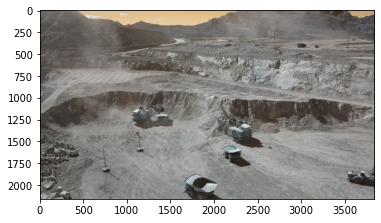

In [ ]:
for i in range(0,img_max+1):
    print(i)
    img_data=img_anotations_prep[img_anotations_prep.file_id==i]
    extract_objects_from_image_in_folder(folder_target_parent,
                                         categories,
                                         folder_from,
                                         img_data)
